# Riferimento
Si usa come riferimento il contenuto dell'articolo di Kob e Andersen [bibliografia]. 
Questo studio utilizza simulazioni di dinamica molecolare per esaminare il comportamento di un liquido atomico superraffreddato, concentrandosi sul regime di rilassamento $\beta$ e trovando che il comportamento temporale e la dipendenza dalla temperatura sono coerenti con le previsioni della teoria del mode-coupling (**MCT**).

Per collegare questo con la random walk con correlazioni a breve raggio, possiamo fare quanto segue:

## Introduzione al Modello di Kob-Andersen
Il modello di Kob-Andersen è una simulazione di dinamica molecolare di un liquido Lennard-Jones misto, che è spesso utilizzato per studiare la transizione vetrosa. Questo modello si basa sull'interazione di particelle in un potenziale Lennard-Jones, che descrive l'energia di interazione tra due atomi o molecole in funzione della loro distanza.

## Connessione con Random Walk Correlato
Per sviluppare un modello di random walk con correlazioni a breve raggio ispirato dalla fisica della transizione vetrosa e dal modello di Kob-Andersen, possiamo considerare:

1. **Correlazioni Positivamente Correlate**: Nei superraffreddati, le particelle tendono a rimanere "intrappolate" in configurazioni locali per tempi lunghi prima di fare un salto significativo. Questo può essere modellato come un random walk in cui le probabilità di fare un passo nella stessa direzione sono più alte (correlazioni positive).

2. **Correlazioni Negativamente Correlate**: In alcuni casi, una particella può avere la tendenza a tornare indietro dopo un passo, magari a causa di un effetto di "cage", dove la particella è intrappolata in un potenziale locale e fa passi avanti e indietro prima di sfuggire. Questo può essere modellato con un random walk con correlazioni negative.

## Modellizzazione
Ecco come possiamo strutturare il modello:

1. **Definizione dello Spazio**: Consideriamo un reticolo 2D o 3D dove le particelle possono muoversi.
2. **Passi Correlati**:
    * Positivamente Correlati: Dopo ogni passo, la direzione del prossimo passo ha una probabilità $p$ di essere nella stessa direzione.
    * Negativamente Correlati: Dopo ogni passo, la direzione del prossimo passo ha una probabilità $q$ di essere nella direzione opposta.
3. **Condizioni di Simulazione**: Impostiamo temperature e condizioni simili a quelle utilizzate nelle simulazioni di Kob-Andersen per osservare come le correlazioni influenzano il comportamento del random walk.

## Simulazioni e Analisi
1. **Self-Intermediate-Scattering Function** (**SISF**): Simuliamo il movimento delle particelle e calcoliamo la SISF nel regime di rilassamento $\beta$ per confrontare con le previsioni della MCT.
2. **Costanti di Diffusione**: Misuriamo le costanti di diffusione delle particelle a diverse temperature e osserviamo come cambiano con la temperatura.

## Implementazione con Python
Nelle celle successive è implementato una funzione di prova *random_walk_correlated* che tiene conto di tutto ciò che è stato descritto nel passo di strutturazione del modello.

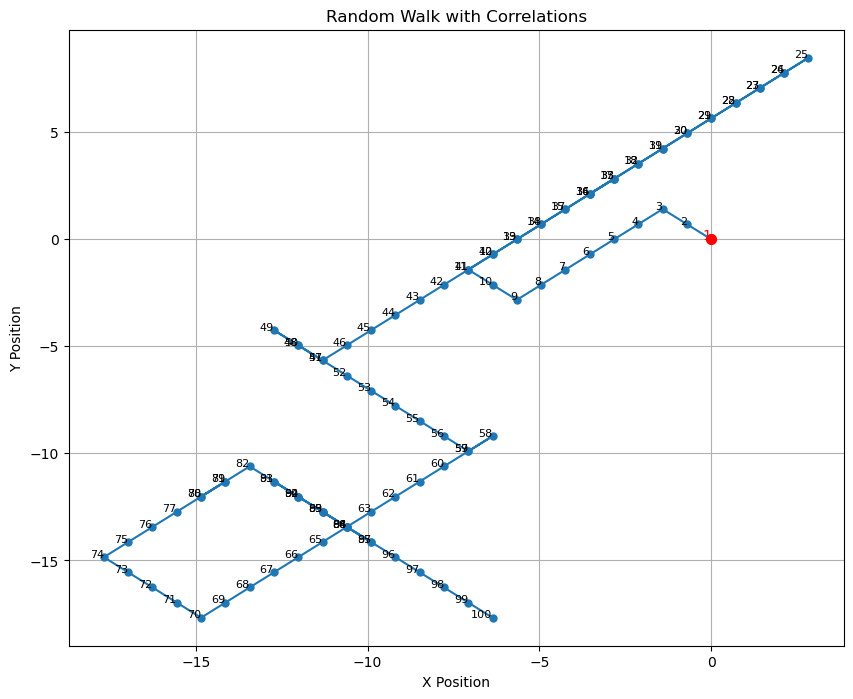

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk_correlated(steps, p, q):
    # Initialize position
    pos = np.zeros((steps, 2))
    
    # Function to get a valid random direction
    def get_random_direction():
        direction = np.zeros(2)
        while np.linalg.norm(direction) == 0:
            direction = np.random.choice([-1, 1], size=2)
        return direction / np.linalg.norm(direction)

    # Random initial direction
    direction = get_random_direction()

    for i in range(1, steps):
        if np.random.rand() < p:  # Continue in the same direction
            pos[i] = pos[i-1] + direction
        elif np.random.rand() < q:  # Reverse direction
            direction = -direction
            pos[i] = pos[i-1] + direction
        else:  # New random direction
            direction = get_random_direction()
            pos[i] = pos[i-1] + direction

    return pos

# Parameters
steps = 100
p = 0.7  # Probability of continuing in the same direction
q = 0.2  # Probability of reversing direction

# Run simulation
walk = random_walk_correlated(steps, p, q)

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(walk[:, 0], walk[:, 1], linestyle='-', marker='o', markersize=5)

# Highlight the first point in red
plt.scatter(walk[0, 0], walk[0, 1], color='red', s=50, zorder=5)
plt.text(walk[0, 0], walk[0, 1], '1', fontsize=10, ha='right', color='red')

# Adding labels for the other points
for i in range(1, steps):
    plt.text(walk[i, 0], walk[i, 1], str(i+1), fontsize=8, ha='right')

plt.title("Random Walk with Correlations")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.grid(True)
plt.show()

Questo è solo un punto di partenza. Per ottenere risultati significativi, è necessario eseguire **molte** simulazioni e raccogliere statistiche su quantità come il **mean square displacement (MSD)** e la **SISF**.

## Conclusione
Con il modello di Kob-Andersen come base, possiamo sviluppare un modello di random walk che includa correlazioni a breve raggio. Utilizzando simulazioni e analisi dettagliate, possiamo esplorare come questi modelli di movimento correlato si comportano in contesti simili a quelli osservati nella transizione vetrosa.

**Una domanda sorge spontanea: come possiamo usare queste informazioni per sviluppare il modello di random walk con correlazioni a breve raggio, sia per una catena polimerica che per una particella che si diffonde in un mezzo vetroso?**

**___________________________________________________________________________________________________________________________**

# **Collegamento con il Modello di Random Walk**

1. **Catena Polimerica con Rigidità Intrinseca:**

    * **Descrizione**: Una catena polimerica con rigidità intrinseca può essere modellata come una random walk con correlazioni positive a breve raggio. La rigidità fa sì che ogni segmento successivo della catena tenda a proseguire nella stessa direzione.

    * **Modello**: Utilizziamo un modello di random walk dove ogni passo ha una probabilità $p$ di essere nella stessa direzione del passo precedente (correlazione positiva).

    * **Simulazione**: Implementiamo un algoritmo di random walk in 2D o 3D che include questa correlazione direzionale. La lunghezza di persistenza può essere controllata per regolare la rigidità della catena.
    
    
    
2. **Particella che si Diffonde in un Mezzo Vetroso:**

    * **Descrizione**: Una particella in un mezzo vetroso può restare intrappolata in una "gabbia" locale per lunghi periodi prima di saltare fuori. Questo comportamento può essere modellato come un random walk con probabilità di ritorno (correlazione negativa) a causa dei vincoli locali.
    
    * **Modello**: Implementiamo un random walk dove ogni passo ha una probabilità $q$ di tornare indietro (correlazione negativa), simile all'effetto di essere intrappolato in una gabbia.
    
    * **Simulazione** : Costruiamo un algoritmo di random walk che incorpora queste probabilità di passo indietro, per simulare il comportamento della particella nel mezzo vetroso.
    

## Analisi e Validazione

### Funzione di Autocorrelazione:

* Calcolare la funzione di autocorrelazione per analizzare le correlazioni temporali.
* Questo aiuta a capire se il comportamento a breve raggio influenza significativamente il movimento a lungo termine.


### Mean Square Displacement (MSD):
* Misurare l'MSD per verificare il comportamento di diffusione a lungo termine.
* Confrontare i risultati con le predizioni teoriche (ad esempio, legge di von Schweidler e scaling con la temperatura).

**___________________________________________________________________________________________________________________________**

#  Modello di Random Walk per Catena Polimerica con Rigidità Intrinseca 

## Descrizione
Per una catena polimerica, possiamo modellare ogni segmento della catena come un passo in un random walk, dove la direzione del passo ha una certa probabilità di mantenere la direzione del passo precedente a causa della rigidità intrinseca della catena.

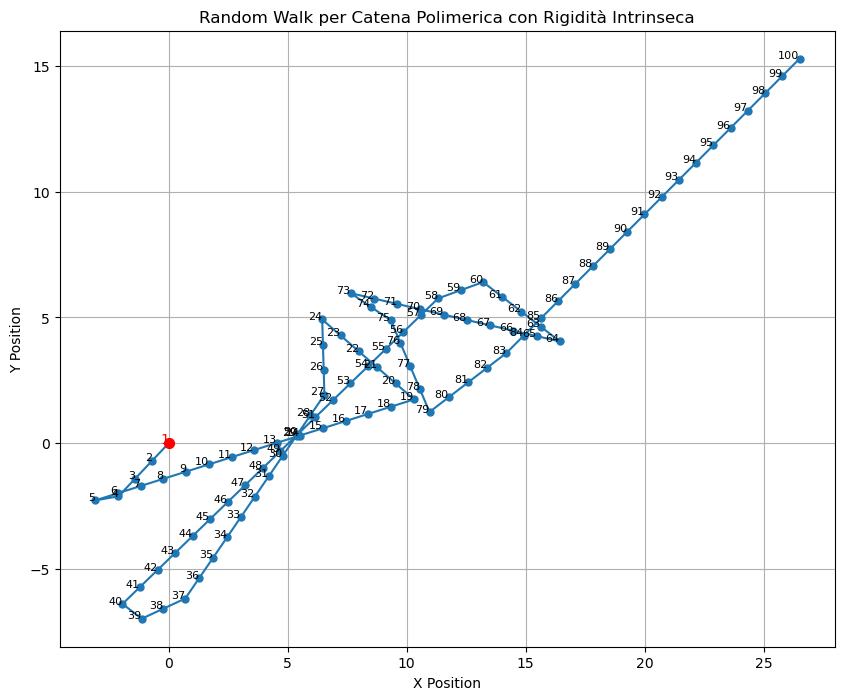

In [2]:
# Definition of the function for the polymer chain's random walk
def random_walk_polymer_chain(steps, p):
    pos = np.zeros((steps, 2))
    
    # Function to get a valid random direction
    def get_random_direction():
        direction = np.zeros(2)
        while np.linalg.norm(direction) == 0:
            direction = np.random.choice([-1, 1], size=2)
        return direction / np.linalg.norm(direction)
    
    # Random initial direction
    direction = get_random_direction()
 
    for i in range(1, steps):
        if np.random.rand() < p:
            step = direction
        else:
            direction = np.random.randn(2)
            direction /= np.linalg.norm(direction)
            step = direction
        
        pos[i] = pos[i-1] + step
    
    return pos

steps = 100
p = 0.8  # Probabilità di continuare nella stessa direzione

walk = random_walk_polymer_chain(steps, p)

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(walk[:, 0], walk[:, 1], linestyle='-', marker='o', markersize=5)

# Highlight the first point in red
plt.scatter(walk[0, 0], walk[0, 1], color='red', s=50, zorder=5)
plt.text(walk[0, 0], walk[0, 1], '1', fontsize=10, ha='right', color='red')

# Adding labels for the other points
for i in range(1, steps):
    plt.text(walk[i, 0], walk[i, 1], str(i+1), fontsize=8, ha='right')

plt.title("Random Walk per Catena Polimerica con Rigidità Intrinseca")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.grid(True)
plt.show()

## Calcolo della Funzione di Autocorrelazione e MSD

### Implementazione della Funzione di Autocorrelazione

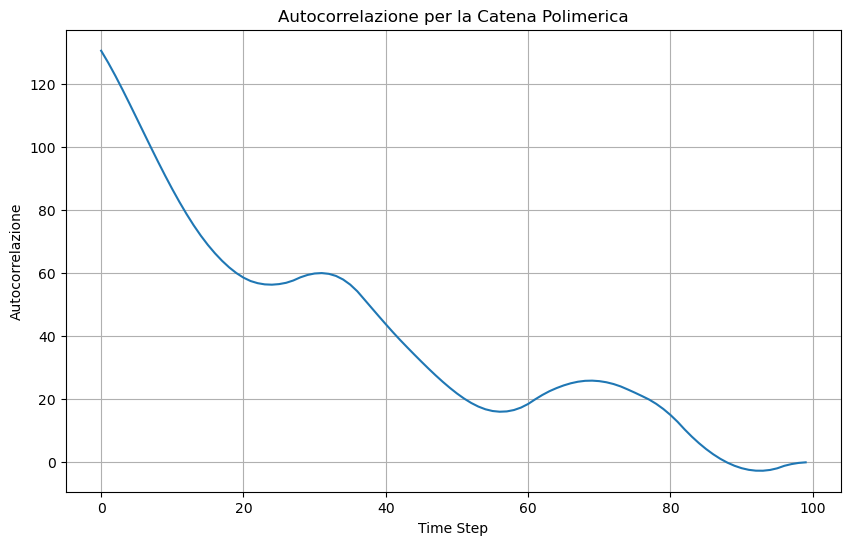

In [3]:
def autocorrelation(positions):
    steps = len(positions)
    corr = np.correlate(positions[:, 0], positions[:, 0], mode='full') / steps
    corr = corr[steps-1:]
    return corr

# Calcolare l'autocorrelazione per il modello della catena polimerica
auto_corr_polymer = autocorrelation(walk)

# Plot dell'autocorrelazione
plt.figure(figsize=(10, 6))
plt.plot(auto_corr_polymer)
plt.title("Autocorrelazione per la Catena Polimerica")
plt.xlabel("Time Step")
plt.ylabel("Autocorrelazione")
plt.grid(True)
plt.show()

### Implementazione della funzione per il calcolo del Mean Square Displacement (MSD)

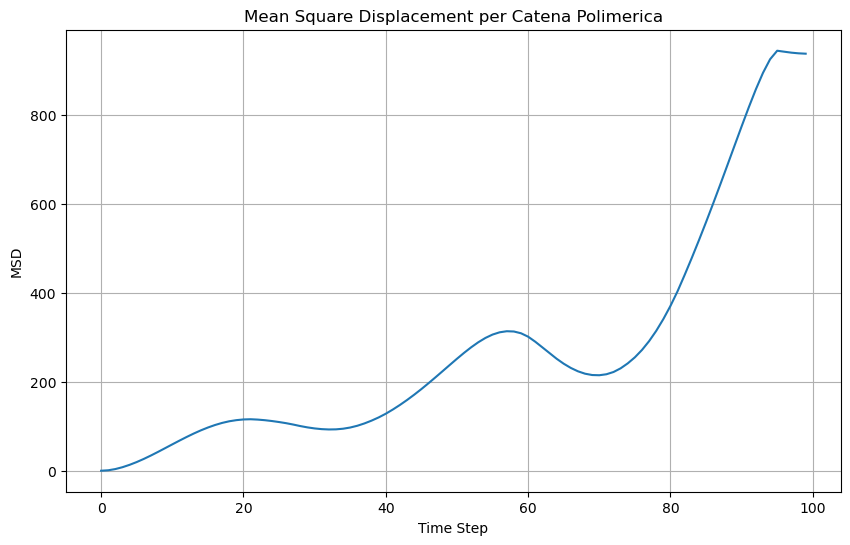

In [4]:
def mean_square_displacement(positions):
    steps = len(positions)
    msd = np.zeros(steps)
    for t in range(steps):
        displacement = positions[t:] - positions[:steps-t]
        squared_displacement = np.sum(displacement**2, axis=1)
        msd[t] = np.mean(squared_displacement)
    return msd

# Calcolare il MSD per il modello della catena polimerica con rigidità intrinseca
msd_polymer_chain = mean_square_displacement(walk)

# Plot del MSD
plt.figure(figsize=(10, 6))
plt.plot(msd_polymer_chain)
plt.title("Mean Square Displacement per Catena Polimerica")
plt.xlabel("Time Step")
plt.ylabel("MSD")
plt.grid(True)
plt.show()

**___________________________________________________________________________________________________________________________**

# Modello di Random Walk per Particella in mezzo vetroso

## Descrizione
Per una particella in un mezzo vetroso, possiamo modellare il comportamento della particella come un random walk dove c'è una certa probabilità di ritornare alla posizione precedente, rappresentando il "trapping" nella gabbia locale.

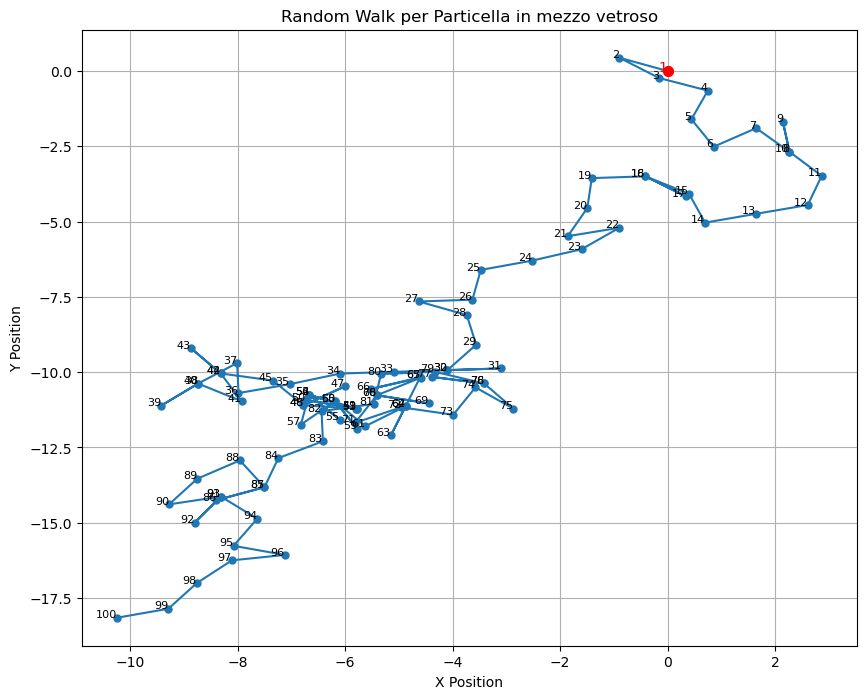

In [5]:
def random_walk_particle_trapped_glassy_medium(steps, q):
    pos = np.zeros((steps, 2))
    direction = np.random.randn(2)
    direction /= np.linalg.norm(direction)
    
    for i in range(1, steps):
        if np.random.rand() < q:
            step = -direction
        else:
            direction = np.random.randn(2)
            direction /= np.linalg.norm(direction)
            step = direction
        
        pos[i] = pos[i-1] + step
    
    return pos

steps = 100
q = 0.2  # Probabilità di tornare indietro

walk = random_walk_particle_trapped_glassy_medium(steps, q)

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(walk[:, 0], walk[:, 1], linestyle='-', marker='o', markersize=5)

# Highlight the first point in red
plt.scatter(walk[0, 0], walk[0, 1], color='red', s=50, zorder=5)
plt.text(walk[0, 0], walk[0, 1], '1', fontsize=10, ha='right', color='red')

# Adding labels for the other points
for i in range(1, steps):
    plt.text(walk[i, 0], walk[i, 1], str(i+1), fontsize=8, ha='right')

plt.title("Random Walk per Particella in mezzo vetroso")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.grid(True)
plt.show()

## Calcolo della Funzione di Autocorrelazione e MSD

### Implementazione della Funzione di Autocorrelazione

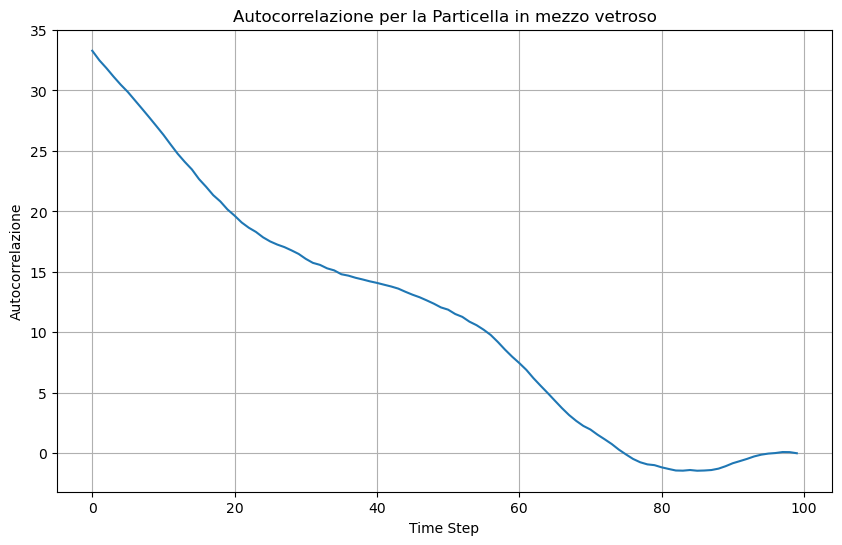

In [6]:
def autocorrelation(positions):
    steps = len(positions)
    corr = np.correlate(positions[:, 0], positions[:, 0], mode='full') / steps
    corr = corr[steps-1:]
    return corr

# Calcolare l'autocorrelazione per il modello della particella intrappolata in mezzo vetroso
auto_corr_particle_trapped = autocorrelation(walk)

# Plot dell'autocorrelazione
plt.figure(figsize=(10, 6))
plt.plot(auto_corr_particle_trapped)
plt.title("Autocorrelazione per la Particella in mezzo vetroso")
plt.xlabel("Time Step")
plt.ylabel("Autocorrelazione")
plt.grid(True)
plt.show()

### Implementazione della funzione per il calcolo del Mean Square Displacement (MSD)

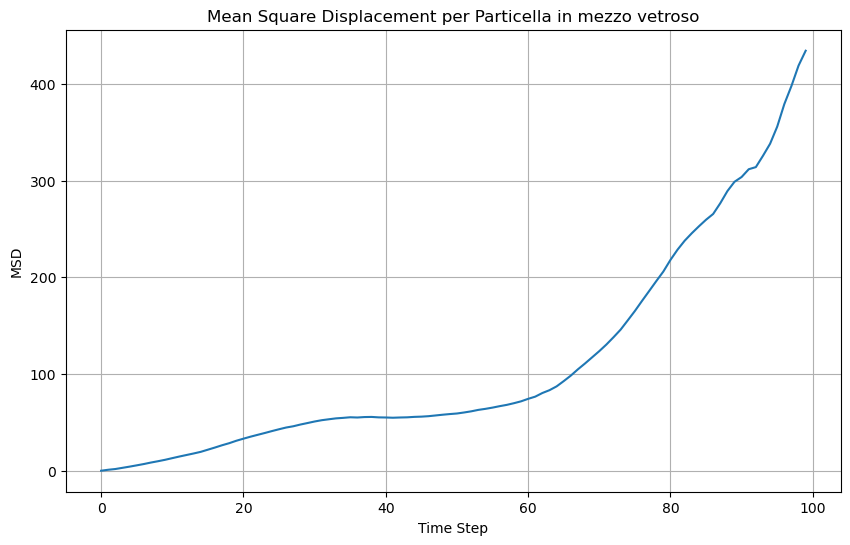

In [7]:
def mean_square_displacement(positions):
    steps = len(positions)
    msd = np.zeros(steps)
    for t in range(steps):
        displacement = positions[t:] - positions[:steps-t]
        squared_displacement = np.sum(displacement**2, axis=1)
        msd[t] = np.mean(squared_displacement)
    return msd

# Calcolare il MSD per il modello della particella intrappolata in mezzo vetroso
msd_particle_trapped = mean_square_displacement(walk)

# Plot del MSD
plt.figure(figsize=(10, 6))
plt.plot(msd_particle_trapped)
plt.title("Mean Square Displacement per Particella in mezzo vetroso")
plt.xlabel("Time Step")
plt.ylabel("MSD")
plt.grid(True)
plt.show()

**___________________________________________________________________________________________________________________________**

**___________________________________________________________________________________________________________________________**

# Possibili Step del progetto:

## Comportamento di Sistemi Complessi
1. **Polimeri con Rigidità Intrinseca**:

    * **Modello di Random Walk con Correlazioni a Breve Raggio**: I polimeri con rigidità intrinseca non si comportano come semplici catene flessibili, ma hanno una certa "memoria" della direzione precedente. Questo si può modellare con un random walk correlato, dove c'è una probabilità elevata di continuare nella stessa direzione.
    * **Aspetti da Studiare**: 
        * **Persistenza della Direzione**: Studiando la correlazione tra i passi successivi, si può capire quanto un polimero tende a mantenere la sua direzione.
        * **Effetti della Rigidità**: Variando il parametro di probabilità p nel modello, si può simulare l'effetto di polimeri con diverse rigidità, osservando come cambiano le proprietà statistiche del percorso.


2. **Particelle in Mezzi Vetrosi**:

    * **Random Walk Correlato e Hopping**: Le particelle in mezzi vetrosi spesso esibiscono dinamiche lente e complesse, con periodi di immobilità interrotti da "salti" improvvisi. Questo può essere modellato introducendo correlazioni e probabilità di inversione di direzione nel random walk.
    * **Aspetti da Studiare**:
        * **Dinamiche Lente**: Utilizzando un modello con alta probabilità di continuare nella stessa direzione (alto p), si possono simulare le dinamiche lente osservate nei sistemi vetrosi.
        * **Transizioni di Fase**: Analizzando come la variazione dei parametri del modello influenza il comportamento del sistema, si possono studiare transizioni di fase dinamiche, come il passaggio da un regime di "liquido" a uno di "vetro".


## Affinamento del Modello e Confronto con Dati Sperimentali
1. **Affinamento del Modello**:

    * **Introduzione di Ulteriori Parametri**: Si possono introdurre ulteriori parametri per modellare meglio la realtà, come l'aggiunta di potenziali di interazione tra le particelle o vincoli di volume.
    * **Simulazioni a Lungo Termine**: Estendere la durata delle simulazioni per osservare il comportamento su scale temporali più lunghe e verificare la stabilità delle previsioni del modello.
2. **Confronto con Dati Sperimentali**:

    * **Raccolta di Dati Sperimentali**: Utilizzare dati provenienti da esperimenti su polimeri o particelle in vetro, come diffusione, spettroscopia o imaging a microscopia.
    * **Validazione del Modello**: Confrontare le predizioni del modello con i dati sperimentali per validarne l'accuratezza. Ad esempio, confrontare la distribuzione delle distanze percorse o il tempo di persistenza delle direzioni.
    * **Adattamento dei Parametri**: Utilizzare i dati sperimentali per calibrare i parametri del modello, rendendolo più rappresentativo del sistema reale.


## Simulazioni con Software di Dinamica Molecolare usati nel corso di Molecular Modeling for Materials

Per quanto riguarda l'utilizzo di software come LAMMPS, Tinker o Orca, ecco una breve guida su come potrebbero essere utilizzati nel contesto del progetto:

- **LAMMPS**:

    * Modellazione di Polimeri: LAMMPS può essere utilizzato per simulare polimeri con diverse rigidità, impostando potenziali di interazione appropriati.
    * Simulazione di Sistemi Vetrosi: Si possono impostare simulazioni di raffreddamento di liquidi per studiare la formazione del vetro e le dinamiche delle particelle.

- **Tinker**:
    * Dinamica Molecolare di Biopolimeri: Tinker è particolarmente utile per la simulazione di biopolimeri come proteine e acidi nucleici. Può essere utilizzato per studiare la flessibilità e la rigidità di questi sistemi.
- **Orca**:

    * Calcoli Quantistici: Orca è un software per la chimica quantistica. Può essere utilizzato per calcolare proprietà elettroniche e energetiche che potrebbero influenzare la dinamica molecolare a livello microscopico.

**___________________________________________________________________________________________________________________________**

**___________________________________________________________________________________________________________________________**

# <span style="color: red"> Self-Intermediate Scattering Function (SISF) </span>

La SISF è una funzione fondamentale per l'analisi delle dinamiche di sistemi complessi, in particolare nei liquidi e nei vetri. Questa funzione fornisce informazioni sul movimento delle particelle nel tempo e nello spazio.

Per calcolare la SISF, dobbiamo analizzare il movimento delle particelle nel tempo utilizzando le coordinate delle particelle in vari istanti temporali. In Python, possiamo farlo estendendo il nostro modello di Random Walk, ma è più efficace utilizzare un software di dinamica molecolare come LAMMPS per ottenere traiettorie realistiche delle particelle.

## Calcolo della SISF in Python
Prima di tutto, rivediamo il calcolo della SISF. La SISF, $F_{s}(q,t)$, è definita come:
\begin{equation}
 F_{s}(q,t) = \left\langle e^{i\mathbf{q}\cdot(\mathbf{r}(t)-\mathbf{r}(0))} \right\rangle 
\end{equation}

dove:
- $\mathbf{q}$ è il vettore d'onda
- $\mathbf{r}(t)$ è la posizione della particella al tempo $t$
- L'angolo acuto $\left\langle \cdot \right\rangle$ rappresenta una media sugli istanti iniziali e sulle particelle

In un contesto di simulazione, possiamo calcolare $F_{s}(q,t)$ come segue:

1. **Simulazione del Random Walk**: Estendiamo il modello di random walk per generare le traiettorie delle particelle.
2. **Calcolo della SISF**: Usiamo le traiettorie generate per calcolare la SISF.


## Implementazione in Python

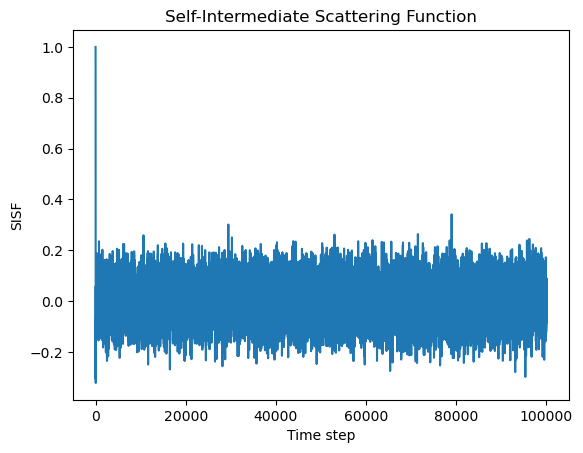

In [14]:
# Parametri della simulazione
n_particles = 100  # Numero di particelle
n_steps = 100000     # Numero di passi
step_length = 1.0  # Lunghezza di ciascun passo
nu = 1 / 10        # Numero d'onda
q = 2 * np.pi * nu  # Vettore d'onda (esempio)

# Generazione delle traiettorie delle particelle
trajectories = np.zeros((n_particles, n_steps, 2))
for i in range(n_particles):
    for j in range(1, n_steps):
        angle = np.random.uniform(0, 2 * np.pi)
        step = step_length * np.array([np.cos(angle), np.sin(angle)])
        trajectories[i, j] = trajectories[i, j-1] + step

# Calcolo della SISF
def calculate_sisf(trajectories, q, n_particles, n_steps):
    sisf = np.zeros(n_steps, dtype=np.complex128)
    for t in range(n_steps):
        sisf[t] = np.mean([
            np.exp(1j * q * np.linalg.norm(trajectories[i, t] - trajectories[i, 0]))
            for i in range(n_particles)
        ])
    return np.real(sisf)

sisf = calculate_sisf(trajectories, q, n_particles, n_steps)

# Plot della SISF
plt.plot(range(n_steps), sisf)
plt.xlabel('Time step')
plt.ylabel('SISF')
plt.title('Self-Intermediate Scattering Function')
plt.show()

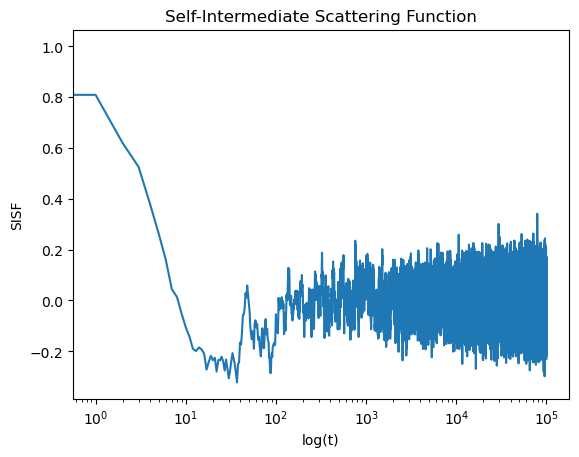

In [15]:
# Plot della SISF con il logaritmo del tempo
plt.plot(range(n_steps), sisf)
plt.xscale('log')
plt.xlabel('log(t)')
plt.ylabel('SISF')
plt.title('Self-Intermediate Scattering Function')
plt.show()

## Identificazione del $\beta$-relaxation regime

La $\beta$-relaxation regime è una fase importante nel comportamento dinamico dei liquidi e dei vetri super raffreddati, ed è descritta dalla teoria del mode-coupling theory (MCT). Questo regime si osserva tipicamente dopo un decadimento rapido iniziale e prima dell'$\alpha$-relaxation regime, caratterizzato da un plateau nella funzione di correlazione intermedia.

Per analizzare il $\beta$-relaxation regime, possiamo considerare la funzione di scattering intermedia $F_{s}(q,t)$ e identificare la fase in cui questa funzione presenta un comportamento di quasi plateau. Una volta identificato il regime, possiamo eseguire un'analisi dettagliata per ottenere le caratteristiche del $\beta$-relaxation.

Time-Step iniziale del beta-regime: 16
Time-Step finale del beta-regime: 26


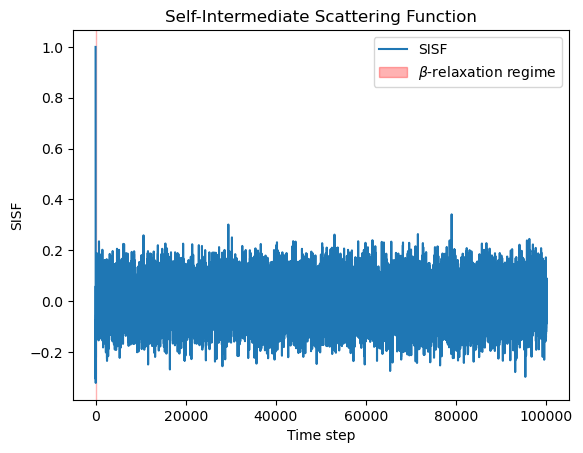

Beta relaxation regime identified from step 16 to step 26


In [16]:
# Funzione per calcolare la media mobile
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Identificazione del \(\beta\)-relaxation regime migliorata basata sulla media mobile
def identify_beta_relaxation(sisf, window_size=10, stability_threshold=0.01, alpha_threshold=0.01):
    smoothed_sisf = moving_average(sisf, window_size)
    sisf_derivative = np.abs(np.diff(smoothed_sisf))
    stable_points = np.where(sisf_derivative < stability_threshold)[0]

    if len(stable_points) == 0:
        return None, None

    plateau_start = stable_points[0]
    
    # Cerca l'inizio del regime \(\alpha\) come punto in cui la derivata rimane costantemente bassa
    for i in range(plateau_start, len(sisf_derivative)):
        if all(sisf_derivative[i:i + window_size] < alpha_threshold):
            plateau_end = i + window_size
            break
    else:
        plateau_end = None

    return plateau_start, plateau_end

# Scelta della threshold da usare
window_size = 10
stability_threshold = 0.01
alpha_threshold = 0.01
plateau_start, plateau_end = identify_beta_relaxation(sisf, window_size, stability_threshold, alpha_threshold)

# Adjust for the window size effect
if plateau_start is not None:
    plateau_start += window_size // 2
if plateau_end is not None:
    plateau_end += window_size // 2

print('Time-Step iniziale del beta-regime:', plateau_start)
print('Time-Step finale del beta-regime:' ,plateau_end)

# Plot della SISF con beta-relaxation regime evidenziato
plt.plot(range(n_steps), sisf, label='SISF')
if plateau_start is not None and plateau_end is not None:
    plt.axvspan(plateau_start, plateau_end, color='red', alpha=0.3, label=r'$\beta$-relaxation regime')
plt.xlabel('Time step')
plt.ylabel('SISF')
plt.title('Self-Intermediate Scattering Function')
plt.legend()
plt.show()

# Analisi del \(\beta\)-relaxation regime
if plateau_start is not None and plateau_end is not None:
    beta_regime = sisf[plateau_start:plateau_end]
    time_steps = np.arange(plateau_start, plateau_end)
    # Analisi del comportamento nel regime di \(\beta\)-relaxation
    print("Beta relaxation regime identified from step {} to step {}".format(plateau_start, plateau_end))
else:
    print("Beta relaxation regime not identified")

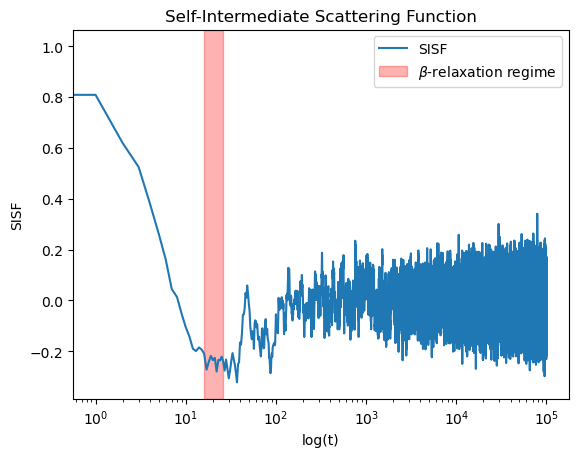

Beta relaxation regime identified from step 16 to step 26


In [17]:
# Plot della SISF con beta-relaxation regime evidenziato
plt.plot(range(n_steps), sisf, label='SISF')

if plateau_start is not None and plateau_end is not None:
    plt.axvspan(plateau_start, plateau_end, color='red', alpha=0.3, label=r'$\beta$-relaxation regime')
plt.xscale('log')
plt.xlabel('log(t)')
plt.ylabel('SISF')
plt.title('Self-Intermediate Scattering Function')
plt.legend()
plt.show()

# Analisi del \(\beta\)-relaxation regime
if plateau_start is not None and plateau_end is not None:
    beta_regime = sisf[plateau_start:plateau_end]
    time_steps = np.arange(plateau_start, plateau_end)
    # Analisi del comportamento nel regime di \(\beta\)-relaxation
    print("Beta relaxation regime identified from step {} to step {}".format(plateau_start, plateau_end))
else:
    print("Beta relaxation regime not identified")

### Uno zoom del $\beta$-relaxation regime

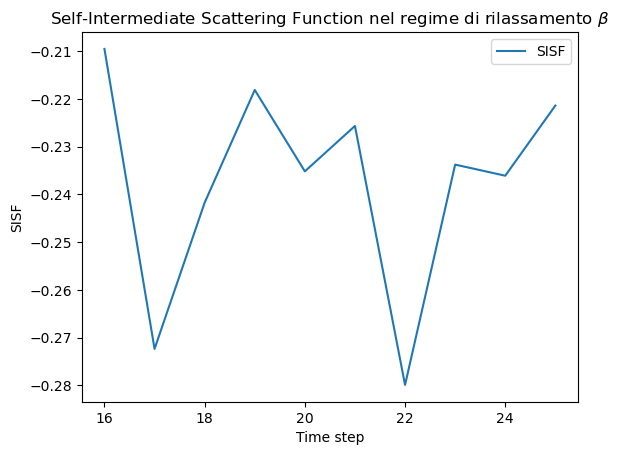

In [18]:
# Plot della SISF con beta-relaxation regime evidenziato
plt.plot(range(plateau_start, plateau_end), sisf[plateau_start:plateau_end], label='SISF')
plt.xlabel('Time step')
plt.ylabel('SISF')
plt.title(r'Self-Intermediate Scattering Function nel regime di rilassamento $\beta$')
plt.legend()
plt.show()

## Simulazione con LAMMPS
Per ottenere traiettorie realistiche delle particelle, possiamo utilizzare LAMMPS per eseguire simulazioni di dinamica molecolare. Ecco un esempio di script LAMMPS per una simulazione semplice e come estrarre le traiettorie per calcolare la SISF:

### Script LAMMPS

```
units       lj
atom_style  atomic

# Creazione della scatola e delle particelle
lattice         fcc 0.8442
region          box block 0 10 0 10 0 10
create_box      1 box
create_atoms    1 box

# Definizione del potenziale di interazione (Lennard-Jones)
pair_style      lj/cut 2.5
pair_coeff      1 1 1.0 1.0 2.5

# Impostazione dei parametri di simulazione
mass            1 1.0
velocity        all create 1.44 87287

# Sistema di integrazione
fix             1 all nve

# Output
thermo          100
dump            1 all custom 100 dump.lammpstrj id type x y z

# Esecuzione della simulazione
run             10000
```

### Analizzare il File di Dump

Coefficiente di Diffusione: 0.0025363545691917634 LJ units


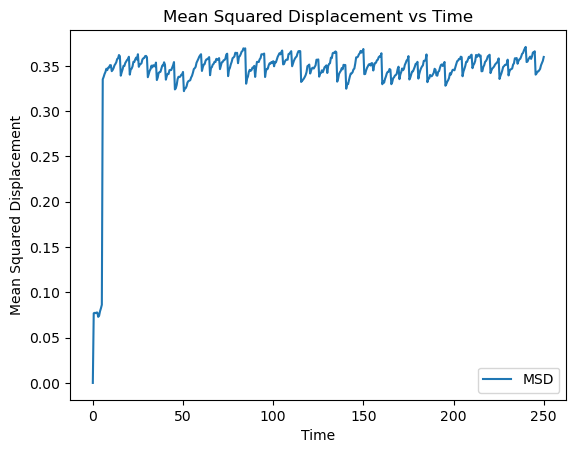

C:\Users\emanu\AppData\Local\Temp\ipykernel_3292\1564326152.py:84: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(timesteps * timestep), np.log(msd), label='MSD')


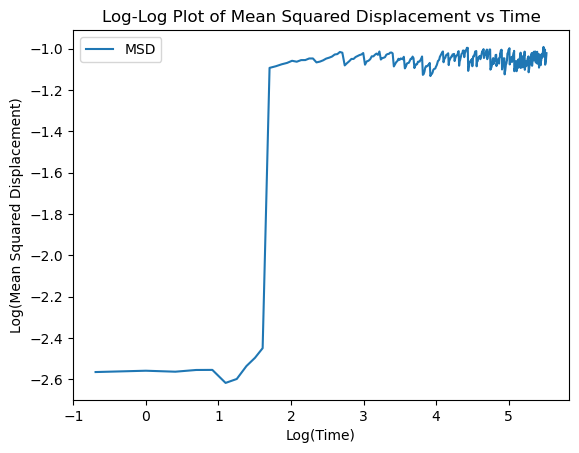

In [20]:
import pandas as pd

# Funzione per leggereil file di dump di LAMMPS e estrae i timesteps, le posizioni degli atomi e i limiti della scatola
def read_lammpstrj(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    timesteps = []
    num_atoms = int(lines[3].strip())
    box_bounds = []
    positions = []
    
    i = 0
    while i < len(lines):
        if 'ITEM: TIMESTEP' in lines[i]:
            timestep = int(lines[i+1].strip())
            timesteps.append(timestep)
            i += 2
        elif 'ITEM: NUMBER OF ATOMS' in lines[i]:
            i += 2
        elif 'ITEM: BOX BOUNDS' in lines[i]:
            bounds = []
            for j in range(3):
                bounds.append([float(x) for x in lines[i+j+1].strip().split()])
            box_bounds.append(bounds)
            i += 4
        elif 'ITEM: ATOMS' in lines[i]:
            atoms = []
            for j in range(num_atoms):
                atoms.append([float(x) for x in lines[i+j+1].strip().split()[2:5]])
            positions.append(atoms)
            i += num_atoms + 1
        else:
            i += 1
            
    return np.array(timesteps), np.array(positions)

# Funzione che calcola il Mean Squared Displacement (MSD) delle particelle
def calculate_msd(positions):
    num_timesteps = positions.shape[0]
    num_atoms = positions.shape[1]
    msd = np.zeros(num_timesteps)
    
    for t in range(num_timesteps):
        displacement = positions[t] - positions[0]
        squared_displacement = np.sum(displacement ** 2, axis=1)
        msd[t] = np.mean(squared_displacement)
    
    return msd

# Funzione che calcola il coefficiente di diffusione dal MSD
def calculate_diffusion_coefficient(msd, timestep, dimension=3):
    time = np.arange(len(msd)) * timestep
    slope, intercept = np.polyfit(time, msd, 1)
    diffusion_coefficient = slope / (2 * dimension)
    return diffusion_coefficient

# Leggi i dati dal file di dump
filename = 'dump.gas_diffusion.lammpstrj'
timesteps, positions = read_lammpstrj(filename)

# Calcola il MSD
msd = calculate_msd(positions)

# Calcola il coefficiente di diffusione
timestep = 0.005  # Il passo temporale usato nella simulazione LAMMPS
diffusion_coefficient = calculate_diffusion_coefficient(msd, timestep)

print(f"Coefficiente di Diffusione: {diffusion_coefficient} LJ units")

# Plot del MSD
import matplotlib.pyplot as plt

plt.figure()
plt.plot(timesteps * timestep, msd, label='MSD')
plt.xlabel('Time')
plt.ylabel('Mean Squared Displacement')
plt.title('Mean Squared Displacement vs Time')
plt.legend()
plt.show()

# Plot del MSD su scala logaritmica
plt.figure()
plt.plot(np.log(timesteps * timestep), np.log(msd), label='MSD')
plt.xlabel('Log(Time)')
plt.ylabel('Log(Mean Squared Displacement)')
plt.title('Log-Log Plot of Mean Squared Displacement vs Time')
plt.legend()
plt.show()


**___________________________________________________________________________________________________________________________**

**___________________________________________________________________________________________________________________________**